# Individual Assignment: Design and Implementation of an Intellignet System Using Machine Learning

## Real world Problem I want to solve
To Predict the disease or classify patient risk using medical records

- **Source** : Kaggle
- **File Name** : heart.csv

## 1.0 Select Dataset, import the dataset and test either it can run correctly

In [2]:
import pandas as pd

In [3]:
# read the file and test it can run completely or not
df = pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


## 2.0 Preprocessing the data: Handle Missing Value and Normalize features

### Handle Missing Value

For handling missing value, if there is value missing, I will use the **median number** to fill up the missing value. 

Heart Disease-related metrics such as blood pressure and cholesterol will have a normal range, so using median number to fill up the missing value is the most stable.

***Why dont't use dropna?*** : Because medical data is very scarcity, drop the data will cause the model generalization, thats why we use median number to fill up the value.

### Drop faulty data: Wrong ca and thal value

In medical field, this two value have a very strict medical value range


**ca** : number of major veseels, the normal range is `0,1,2,3,4`, it is impossible to have a value that more than 4

**thal** : Thalassemia, the normal range is more than 0

In [4]:
# drop faulty data
df = df[(df['ca'] >= 0) & (df['ca'] <= 4)]
df = df[df['thal'] > 0]

# Handle Missing Value
df = df.fillna(df.median())

# Check if there any missing value else
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Normalize features

I will normalize the features by using **StandardScalar**, because it is not sensitive to unsual value and preserve the shape of the data distribution.

But we cannot normalize the features before spliting the data into into training data and testing data, because it will cause data leakgae, which mean that the model will also calculate and know the value in test dataset. So what I going to do is:
1. Split the data
2. Normalize the Feature

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data
X = df.drop('target',axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

# Normalize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.0 Apply Classification Model

For the model selection, I choose **Random Forest**, as it can make a better prediction than **Logistic Regression**

In [6]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

## 4.0 Train and Predict the value

In [7]:
# Train Data
random_forest.fit(X_train,y_train)

# Predict y
y_pred = random_forest.predict(X_test)

## 5.0 Evaluate the Result

### Accuracy

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.8571


### Precision

In [9]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.8519


### Recall

In [10]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9020


### F1-Score

In [11]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8762


In [12]:
# a show to the result of the prediciton

print(y_pred)

[0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1]


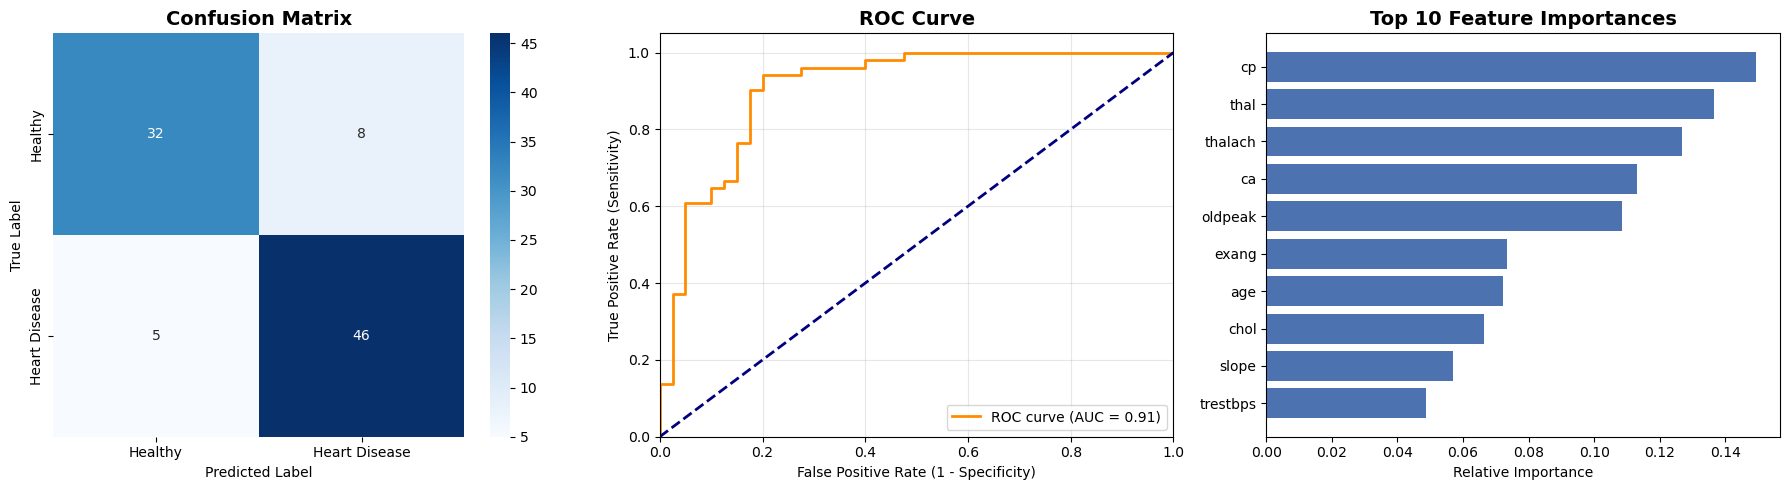

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc


fig, axes = plt.subplots(1, 3, figsize=(18, 5))




y_pred = random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')




y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate (1 - Specificity)')
axes[1].set_ylabel('True Positive Rate (Sensitivity)')
axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)





importances = random_forest.feature_importances_

feature_names = X_test.columns

indices = np.argsort(importances)[::-1]

top_n = 10 

axes[2].barh(range(top_n), importances[indices[:top_n]], align='center', color='#4c72b0')
axes[2].set_yticks(range(top_n))
axes[2].set_yticklabels([feature_names[i] for i in indices[:top_n]])
axes[2].invert_yaxis()  
axes[2].set_xlabel('Relative Importance')
axes[2].set_title(f'Top {top_n} Feature Importances', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()